In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from collections import defaultdict

sns.set(style={'style': "whitegrid", 'axes.grid' : False}, font_scale=1.5)

In [2]:
import os
os.getcwd()

'C:\\Users\\isvandroffelaa\\Documents\\model\\adaptive_policies\\analysis'

In [3]:
mode = "sp_const"  # shortest path
# mode = "const"  # random walk

num_units = 3
num_sensors = 10
manhattan_diam = 10
run_length = int(5 + (0.5 * manhattan_diam))
rbf_shape = 'linear'
numrbf = 2
nfe = 10000

In [4]:
# results_reopt = pd.read_csv(f'../reopt/results/HPC_results/manhattan/nfe{nfe}/results_N10_R100_U{num_units}_S{num_sensors}_upto1.csv')
results_reopt = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]: 
        for instance in range(10):
            try: 
                results_ = pd.read_csv(f'../reopt/results/HPC_results/manhattan/nfe{nfe}/results_{mode}_N{manhattan_diam}_R100_U{num_units}_S{num_sensors}.csv')
                results_reopt = pd.concat([results_reopt, results_])
            except: 
                print(num_units, num_sensors)

In [5]:
results_reopt

,manhattan_diameter,n_realizations,num_units,num_sensors,instance,pct_intercepted
0,10.0,100.0,3.0,3.0,0.0,0.35
1,10.0,100.0,3.0,3.0,1.0,0.51
2,10.0,100.0,3.0,3.0,2.0,0.63
3,10.0,100.0,3.0,3.0,3.0,0.42
4,10.0,100.0,3.0,3.0,4.0,0.29
...,...,...,...,...,...,...
5,10.0,100.0,10.0,10.0,5.0,0.91
6,10.0,100.0,10.0,10.0,6.0,0.91
7,10.0,100.0,10.0,10.0,7.0,0.74
8,10.0,100.0,10.0,10.0,8.0,0.95


In [6]:
results_oneshot = defaultdict(dict)
for num_units in [3, 10]:
    for num_sensors in [3, 10]: 
        try: 
            results_ = pd.read_pickle(f'../reopt/results/grid/{mode}_nosensorinfo_pct_intercepted_N{manhattan_diam}_R100_U{num_units}_numsensors{num_sensors}.pkl')
            results_oneshot[num_units, num_sensors] = results_
        except: 
            print(num_units, num_sensors)

In [7]:
results_oneshot

defaultdict(dict,
            {(3, 3): {0: 0.37,
              1: 0.38,
              2: 0.26,
              3: 0.23,
              4: 0.2,
              5: 0.54,
              6: 0.25,
              7: 0.29,
              8: 0.3,
              9: 0.43},
             (3, 10): {0: 0.37,
              1: 0.38,
              2: 0.26,
              3: 0.23,
              4: 0.2,
              5: 0.54,
              6: 0.25,
              7: 0.29,
              8: 0.3,
              9: 0.43},
             (10, 3): {0: 0.5,
              1: 0.7,
              2: 0.85,
              3: 0.76,
              4: 0.69,
              5: 0.75,
              6: 0.75,
              7: 0.57,
              8: 0.81,
              9: 0.72},
             (10, 10): {0: 0.5,
              1: 0.7,
              2: 0.85,
              3: 0.76,
              4: 0.69,
              5: 0.75,
              6: 0.75,
              7: 0.57,
              8: 0.81,
              9: 0.72}})

In [8]:
# path = f"../DPS/grid/results_HPC/10k nfe/*R100*U{num_units}*S{num_sensors}*{rbf_shape}*.csv"

# TODO change to new HPC results

files = []
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        path = f"../DPS/grid/results_HPC/*{mode}_*N{manhattan_diam}*R100*U{num_units}*S{num_sensors}*{rbf_shape}*numrbf{numrbf}*.csv"
        files.extend(glob.glob(path))

len(files)

400

In [9]:
# file = files[0]
# 
# split1 = file.replace("\\", "_")
# split2 = split1.replace(".", "_")
# split3 = split2.split("_")
# 
# split3

In [10]:
# num_sensors = 3
# 
# for seq in split3:
#     if "seed" in seq: 
#         _, seed = seq.split("seed")
#     elif "U" in seq: 
#         _, num_units = seq.split("U")
#     elif "S" in seq:
#         _, num_sensors = seq.split("S")
#         print('hey')
#     elif "numrbf" in seq:
#         _, num_rbf = seq.split("numrbf")
# 
# print(seed, num_units, num_sensors, num_rbf)

In [11]:
results_DPS = pd.DataFrame()

for file in files:
    results_per_file = pd.DataFrame()
    # best score = file content
    imported_df = pd.read_csv(file)
    
    results_per_file['nfe'] = imported_df['nfe']
    results_per_file['intercepted'] = 1 - imported_df['not_intercepted']

    # extract S, U, seed from filename using .split()
    split1 = file.replace("\\", "_")
    split2 = split1.replace(".", "_")
    split3 = split2.split("_")

    num_sensors = 3
    for seq in split3:
        if "seed" in seq: 
            _, seed = seq.split("seed")
        elif "instance" in seq:
            _, instance = seq.split("instance")
        elif "U" in seq: 
            _, num_units = seq.split("U")
        elif "numrbf" in seq:
            _, num_rbf = seq.split("numrbf")
        elif "S" in seq:
            _, num_sensors = seq.split("S")

            
    if "cubic" in split3: 
        rbf = "cubic"
    elif "gaussian" in split3:
        rbf = "gaussian"
    elif "linear" in split3:
        rbf = "linear"
            
    results_per_file['seed'] = int(seed)
    results_per_file['instance'] = int(instance)
    results_per_file['num_units'] = int(num_units)
    results_per_file['num_sensors'] = int(num_sensors)
    results_per_file['rbf'] = rbf
    results_per_file['numrbf'] = int(num_rbf)
    results_per_file['instance/seed'] = str(instance) + ', ' + str(seed)
    
#     results_per_file['num_units_num_sensors'] = f"{num_units}_{num_sensors}"
#     results_per_file['US_seed'] = f"{num_units}_{num_sensors}_{seed}"
    
    results_DPS = pd.concat([results_DPS, results_per_file])

In [12]:
results_DPS

,nfe,intercepted,seed,instance,num_units,num_sensors,rbf,numrbf,instance/seed
0,100,0.17,0,0,3,3,linear,2,"0, 0"
1,10047,0.38,0,0,3,3,linear,2,"0, 0"
2,1070,0.32,0,0,3,3,linear,2,"0, 0"
3,1166,0.32,0,0,3,3,linear,2,"0, 0"
4,1265,0.35,0,0,3,3,linear,2,"0, 0"
...,...,...,...,...,...,...,...,...,...
98,9619,0.83,9,9,10,10,linear,2,"9, 9"
99,965,0.46,9,9,10,10,linear,2,"9, 9"
100,9715,0.83,9,9,10,10,linear,2,"9, 9"
101,9814,0.83,9,9,10,10,linear,2,"9, 9"


In [13]:
best_scores = defaultdict(dict)
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_DPS.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                best_scores[num_units, num_sensors, instance] = max(results_subset['intercepted'])
            except: 
                pass

In [14]:
best_scores

defaultdict(dict,
            {(3, 3, 0): 0.39,
             (3, 3, 1): 0.5,
             (3, 3, 2): 0.61,
             (3, 3, 3): 0.42000000000000004,
             (3, 3, 4): 1.0,
             (3, 3, 5): 0.6799999999999999,
             (3, 3, 6): 0.4,
             (3, 3, 7): 0.61,
             (3, 3, 8): 0.5900000000000001,
             (3, 3, 9): 0.52,
             (3, 10, 0): 0.49,
             (3, 10, 1): 0.65,
             (3, 10, 2): 0.61,
             (3, 10, 3): 0.42000000000000004,
             (3, 10, 4): 1.0,
             (3, 10, 5): 0.74,
             (3, 10, 6): 0.43000000000000005,
             (3, 10, 7): 0.62,
             (3, 10, 8): 0.47,
             (3, 10, 9): 0.55,
             (10, 3, 0): 1.0,
             (10, 3, 1): 0.97,
             (10, 3, 2): 0.94,
             (10, 3, 3): 0.96,
             (10, 3, 4): 0.91,
             (10, 3, 5): 0.92,
             (10, 3, 6): 0.99,
             (10, 3, 7): 1.0,
             (10, 3, 8): 1.0,
             (10, 3, 9): 0.

In [15]:
# scale score to optimum found with MIP solver
scaled_result_list = []
for index, row in results_DPS.iterrows():
    best_score_at_row = best_scores[row['num_units'], row['num_sensors'], row['instance']]
    scaled_score = row['intercepted'] / best_score_at_row
    scaled_result_list.append(scaled_score)

results_DPS['scaled score'] = scaled_result_list

In [16]:
results_DPS

,nfe,intercepted,seed,instance,num_units,num_sensors,rbf,numrbf,instance/seed,scaled score
0,100,0.17,0,0,3,3,linear,2,"0, 0",0.435897
1,10047,0.38,0,0,3,3,linear,2,"0, 0",0.974359
2,1070,0.32,0,0,3,3,linear,2,"0, 0",0.820513
3,1166,0.32,0,0,3,3,linear,2,"0, 0",0.820513
4,1265,0.35,0,0,3,3,linear,2,"0, 0",0.897436
...,...,...,...,...,...,...,...,...,...,...
98,9619,0.83,9,9,10,10,linear,2,"9, 9",0.892473
99,965,0.46,9,9,10,10,linear,2,"9, 9",0.494624
100,9715,0.83,9,9,10,10,linear,2,"9, 9",0.892473
101,9814,0.83,9,9,10,10,linear,2,"9, 9",0.892473


In [17]:

# results_subset = results[results.rbf == rbf]
# ax = sns.scatterplot(data=results_subset, x='nfe', y='scaled score', hue='num_units/instance', palette='tab10', alpha=0.05)
# ax = sns.scatterplot(data=results_DPS, x='nfe', y='scaled score', hue='instance', alpha=0.5)
# ax.set(ylim=(0, 1.1))
# plt.savefig(f'figs/{rbf}_singlecolor.png', dpi=300, bbox_inches='tight')
# plt.show()

In [18]:
# colors = ['#1f77b4']# Set your custom color palette
# # sns.set_palette(sns.color_palette(colors, len(results['instance/seed'].unique())))
# sns.set_palette(sns.color_palette(colors, 10))
# 
# for instance in results['instance'].unique():
#     results_subset = results[results.instance == instance]
#     # ax = sns.scatterplot(data=results_subset, x='nfe', y='scaled score', hue='num_units/instance', palette='tab10', alpha=0.05)
#     ax = sns.scatterplot(data=results_subset, x='nfe', y='scaled score', hue='seed', palette=colors, alpha=0.5, legend=False)
#     ax.set(ylim=(0, 1.1))
#     # plt.savefig(f'figs/{rbf}_singlecolor.png', dpi=300, bbox_inches='tight')
#     plt.show()

In [19]:
# from matplotlib.lines import Line2D
# 
# custom_lines = [Line2D([], [], color='tab:blue', lw=4, label='DPS'),
#                 Line2D([], [], color='tab:red', lw=4, label='PTO'),
#                 Line2D([], [], color='tab:green', lw=4, label='PRO'),
#                 Line2D([], [], color='gray', lw=4, label='one-shot')]
# 
# colors = ['#1f77b4']# Set your custom color palette
# colors2 = ['#d62728']
# # sns.set_palette(sns.color_palette(colors, len(results['instance/seed'].unique())))
# sns.set_palette(sns.color_palette(colors, 10))
# sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
# 
# for instance in results_DPS['instance'].unique():
# # for instance in [3,4]:
#     results_subset = results_DPS[results_DPS.instance == instance]
#     results_subset.reset_index(inplace=True, drop=True)
#     # ax = sns.scatterplot(data=results_subset, x='nfe', y='scaled score', hue='num_units/instance', palette='tab10', alpha=0.05)
#     ax = sns.lineplot(data=results_subset, x='nfe', y='intercepted', hue='instance/seed', palette=colors, alpha=0.5, legend=False)
# 
#     # if instance in [0, 1]: 
#     results_PTO = pd.read_csv(f'C:/Users/isvandroffelaa/Documents/model/adaptive_policies/ptreeoptperunit/fugitive_interceptions/results_HPC/perunit/results_N10_T10_R100_U{num_units}_numsensors{num_sensors}_instance{instance}.csv')
#     results_PTO['intercepted'] = 1- results_PTO['best_f']
#     ax2 = sns.lineplot(data=results_PTO, x='nfe', y='intercepted', hue='seed', palette=colors2, alpha=0.5, legend=False)
# 
#     results_reopt_subset = results_reopt[results_reopt.instance==instance]['pct_intercepted']
#     results_reopt_subset.reset_index(inplace=True, drop=True)
#     plt.axhline(y=results_reopt_subset[0],c='tab:green', linestyle=(0, (3, 1, 1 ,1))) 
# 
#     plt.axhline(y=results_oneshot[instance],c='gray', linestyle="dashed")
#     # plt.axhline(y=0.75,c='gray', linestyle="dashed")
# 
#     ax.legend(handles=custom_lines, loc='upper left')
#     sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# 
#     ax.set(ylim=(0, 1.1))
#     # ax.set(xlim=(-40, 5200))
#     # plt.savefig(f'figs/U{num_units}S{num_sensors}/convergence_PRO_DPS_PTO_OS_instance{instance}_rbf{rbf_shape}_numrbf{numrbf}.png', dpi=300, bbox_inches='tight')
#     plt.show()
# #     

In [20]:
# from matplotlib.lines import Line2D
# 
# custom_lines = [Line2D([], [], color='tab:blue', lw=4, label='adaptive'),
#                 # Line2D([], [], color='tab:red', lw=4, label='PTO'),
#                 Line2D([], [], color='gray', lw=4, label='one-shot')]
# 
# colors = ['#1f77b4']# Set your custom color palette
# colors2 = ['#d62728']
# # sns.set_palette(sns.color_palette(colors, len(results['instance/seed'].unique())))
# sns.set_palette(sns.color_palette(colors, 10))
# 
# # for instance in results['instance'].unique():
# for instance in [3]:
#     results_subset = results_DPS[results_DPS.instance == instance]
#     results_subset.reset_index(inplace=True, drop=True)
#     # ax = sns.scatterplot(data=results_subset, x='nfe', y='scaled score', hue='num_units/instance', palette='tab10', alpha=0.05)
#     ax = sns.lineplot(data=results_subset, x='nfe', y='intercepted', hue='instance/seed', palette=colors, alpha=0.5, legend=False)
#     
#     if instance in [0, 1]: 
#         results_PTO = pd.read_csv(f'results_N10_T10_R100_U10_numsensors10_instance{instance}.csv')
#         results_PTO['intercepted'] = 1- results_PTO['best_f']
#         ax2 = sns.lineplot(data=results_PTO, x='nfe', y='intercepted', hue='seed', palette=colors2, alpha=0.5, legend=False)
#     
#     results_reopt_subset = results_reopt[results_reopt.instance==1]['pct_intercepted']
#     results_reopt_subset.reset_index(inplace=True, drop=True)
#     plt.axhline(y=0.56,c='gray', linestyle="dashed") 
#     
#     ax.legend(handles=custom_lines, loc='upper left')
#     sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#     
#     ax.set(ylim=(0, 1.1))
#     ax.set(xlim=(-40, 5200))
#     plt.ylabel('Percentage intercepted')
#     plt.xlabel('Number of function evaluations')
#     plt.savefig(f'figs/MScPolicing.png', dpi=300, bbox_inches='tight')
#     plt.show()
# #     

# Plot starting positions

In [21]:
from network import manhattan_graph
import matplotlib as mpl
import networkx as nx
from matplotlib.lines import Line2D

In [22]:
def draw_edges(graph, fugitive_routes):
    edges_fugitive = []

    for r, _ in enumerate(fugitive_routes):
        route = fugitive_routes[r]
        for t in range(1, len(route)):
            edges_fugitive1 = [(route[t], route[t-1])]
            edges_fugitive2 = [(route[t-1], route[t])]
            edges_fugitive.extend(tuple(edges_fugitive1))
            edges_fugitive.extend(tuple(edges_fugitive2))

    edge_colormap = ['lightgray'] * len(graph.edges())
    edge_weightmap = [1] * len(graph.edges())
    for index, edge in enumerate(graph.edges()):
        if edge in edges_fugitive:
            edge_colormap[index] = 'tab:orange'
            edge_weightmap[index] = 2

    return edge_colormap, edge_weightmap

In [23]:
def draw_nodes(graph, fugitive_start, unit_start, sensor_locations):
    node_colormap = ['lightgray']*len(graph.nodes)
    node_weightmap = [1]*len(graph.nodes)
    
    # escape nodes: all boundary nodes
    escape_nodes = [node for node in graph.nodes() if graph.degree[node] != 4]

    for index, node in enumerate(graph.nodes()):
        if node in escape_nodes:
            node_colormap[index] = 'tab:red'
            node_weightmap[index] = 100
            
        elif node == fugitive_start:
            node_colormap[index] = 'tab:orange'
            node_weightmap[index] = 100
        
        elif node in sensor_locations:
            node_colormap[index] = '#4caf50'
            node_weightmap[index] = 100

        elif node in unit_start:
            node_colormap[index] = 'tab:blue'
            node_weightmap[index] = 100

    return node_colormap, node_weightmap

In [24]:
def plot_map(graph, pos, fugitive_start, fugitive_routes, unit_start, sensor_locations, rep):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5)) #, gridspec_kw={'height_ratios': [1, 0.6]})
    node_colormap, node_weightmap = draw_nodes(graph, fugitive_start, unit_start, sensor_locations)
    edge_colormap, edge_weightmap = draw_edges(graph, fugitive_routes)

    nx.draw_networkx_nodes(G=graph, pos=pos,
                           node_color=node_colormap, alpha=0.9, node_size=node_weightmap,
                           node_shape=mpl.markers.MarkerStyle(marker='o', fillstyle='full'), ax=ax)

    #nx.draw_networkx_labels(G=graph, pos=pos, labels=labels_at_step, font_size=10, ax=ax[0])

    nx.draw_networkx_edges(G=graph, pos=pos, edge_color=edge_colormap, width=edge_weightmap, alpha=0.9, ax=ax)

    #ax[0] = plt.gca()
    #ax[0].set_aspect('equal')
    #ax[0].set_facecolor('white')

    # legend
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='pursuer',
                              markerfacecolor='tab:blue', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='evader',
                              markerfacecolor='tab:orange', markersize=8)
                       # , Line2D([0], [0], marker='o', color='w', label='sensor',
                       #        markerfacecolor='#4caf50', markersize=8)
                       ]

    #plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 1.6))
    plt.rcParams["axes.linewidth"] = 0
    plt.savefig(f'figs/starts/startconfig_routes_U{num_units}_S{num_sensors}_instance{rep}.png', bbox_inches='tight', dpi=300)
    plt.close(fig)

In [25]:
num_units = 3
num_sensors = 10

for instance in range(10):
# for instance in [0]:
    graph, labels, labels_inv, pos = manhattan_graph(N=10)

    police_start = pd.read_pickle(
        f"../data/grid/sp_const_units_start_N{10}_T{10}_R{100}_U{num_units}_numsensors{num_sensors}_instance{instance}.pkl")
    fugitive_start = pd.read_pickle(
        f"../data/grid/sp_const_fugitive_start_N{10}_T{10}_R{100}_U{num_units}_numsensors{num_sensors}_instance{instance}.pkl")
    fugitive_routes = pd.read_pickle(
        f"../data/grid/sp_const_fugitive_routes_N{10}_T{10}_R{100}_U{num_units}_numsensors{num_sensors}_instance{instance}.pkl")
    sensor_locations = pd.read_pickle(
        f"../data/grid/sp_const_sensors_N{10}_T{10}_R{100}_U{num_units}_numsensors{num_sensors}_instance{instance}.pkl")

    plot_map(graph=graph, pos=pos, fugitive_start=fugitive_start, fugitive_routes=fugitive_routes, unit_start=police_start, sensor_locations=sensor_locations, rep=instance)

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_14424\2023762808.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G=graph, pos=pos, edge_color=edge_colormap, width=edge_weightmap, alpha=0.9, ax=ax)
C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_14424\2023762808.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G=graph, pos=pos, edge_color=edge_colormap, width=edge_weightmap, alpha=0.9, ax=ax)
C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_14424\2023762808.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G=graph, pos=pos, edge_color=edge_colormap, width=edge_weightmap, alpha=0.9, ax=ax)
C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_14424\2023762808.

In [26]:
len(graph.edges())

180

In [27]:
results_PTO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_PTO_instance = pd.read_csv(f'C:/Users/isvandroffelaa/Documents/model/adaptive_policies/ptreeoptperunit/fugitive_interceptions/results_HPC/perunit/results_{mode}_N{manhattan_diam}_T{run_length}_R100_U{num_units}_numsensors{num_sensors}_instance{instance}.csv')
                results_PTO_instance['intercepted'] = 1 - results_PTO_instance['best_f']
                
                results_PTO=pd.concat([results_PTO, results_PTO_instance], ignore_index=True)
            except:
                print(num_units, num_sensors, instance)

In [28]:
results_PTO

,nfe,time,best_f,best_P,instance,seed,manhattan_diam,num_units,num_sensors,intercepted
0,100,0,0.78,[<ptreeopt.tree.PTree object at 0x1555284e5fd0...,0,0,10,3,3,0.22
1,200,1,0.78,[<ptreeopt.tree.PTree object at 0x1555284e5fd0...,0,0,10,3,3,0.22
2,300,2,0.77,[<ptreeopt.tree.PTree object at 0x15552849b190...,0,0,10,3,3,0.23
3,400,3,0.75,[<ptreeopt.tree.PTree object at 0x1555284853a0...,0,0,10,3,3,0.25
4,500,4,0.75,[<ptreeopt.tree.PTree object at 0x1555284853a0...,0,0,10,3,3,0.25
...,...,...,...,...,...,...,...,...,...,...
39995,9600,334,0.40,[<ptreeopt.tree.PTree object at 0x155520654bb0...,9,9,10,10,10,0.60
39996,9700,338,0.40,[<ptreeopt.tree.PTree object at 0x155520654bb0...,9,9,10,10,10,0.60
39997,9800,341,0.40,[<ptreeopt.tree.PTree object at 0x155520654bb0...,9,9,10,10,10,0.60
39998,9900,344,0.40,[<ptreeopt.tree.PTree object at 0x155520654bb0...,9,9,10,10,10,0.60


# Seed variability

In [29]:
PTO_variability = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            for seed in range(10):
                try:                
                    results_subset = results_PTO.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance} & seed == {seed}')
                    df_seed = pd.DataFrame()
                    df_seed['num_units'] = [num_units]
                    df_seed['num_sensors'] = [num_sensors]
                    df_seed['instance'] = [instance]
                    df_seed['seed'] = [seed]
                    df_seed['best_score'] = [max(results_subset['intercepted'])]
                    
                    PTO_variability = pd.concat([PTO_variability, df_seed], ignore_index=True)
                except:
                    print(num_units, num_sensors, instance)
PTO_variability['|U|, |S|'] = PTO_variability['num_units'].astype(int).astype(str) + ', ' + PTO_variability['num_sensors'].astype(int).astype(str)

C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


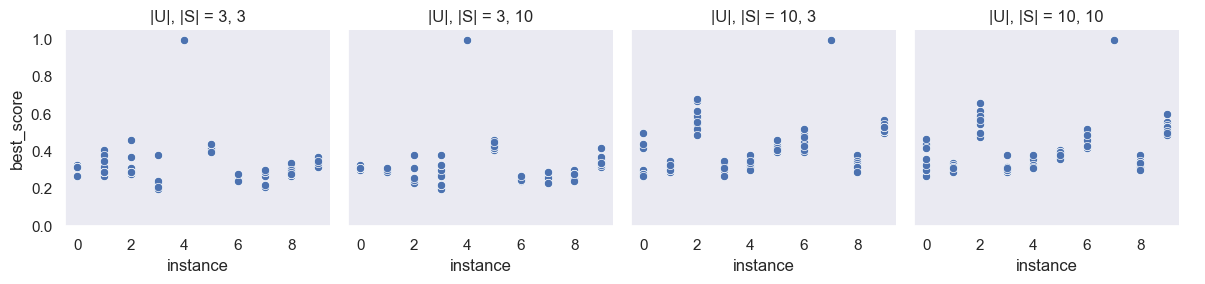

In [30]:
sns.set(style={'style': "whitegrid", 'axes.grid' : False})

sub = ['3, 3','3, 10','10, 3','10, 10']
#select just the sub data at once
dfs = PTO_variability[PTO_variability['|U|, |S|'].isin(sub)]

g = sns.FacetGrid(dfs, 
                  col='|U|, |S|', 
                  # col_wrap=2, # here it means 2 columns depending on the position you want
                  legend_out=True) 
g.map(sns.scatterplot, 'instance', 'best_score').add_legend()
plt.ylim(0, 1.05)
# g.fig.suptitle('PTO variability')
g.savefig('figs/variability/PTO.png', dpi=300)

C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


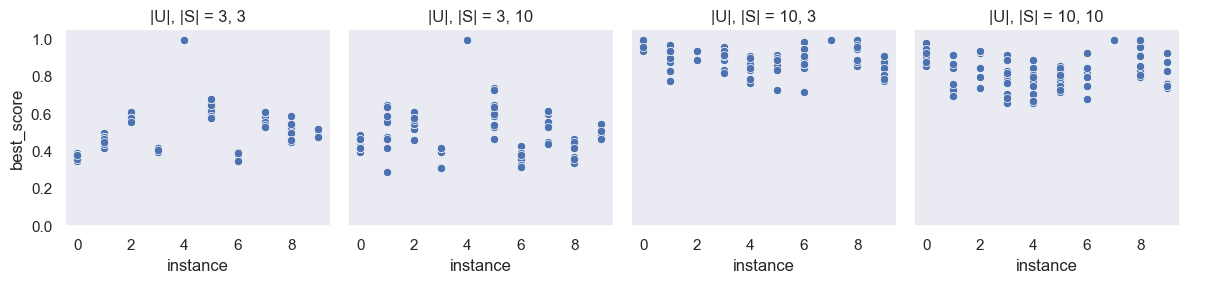

In [31]:
DPS_variability = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            for seed in range(10):
                try:                
                    results_subset = results_DPS.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance} & seed == {seed}')
                    df_seed = pd.DataFrame()
                    df_seed['num_units'] = [num_units]
                    df_seed['num_sensors'] = [num_sensors]
                    df_seed['instance'] = [instance]
                    df_seed['seed'] = [seed]
                    df_seed['best_score'] = [max(results_subset['intercepted'])]
                    
                    DPS_variability = pd.concat([DPS_variability, df_seed], ignore_index=True)
                except:
                    print(num_units, num_sensors, instance)
DPS_variability['|U|, |S|'] = DPS_variability['num_units'].astype(int).astype(str) + ', ' + DPS_variability['num_sensors'].astype(int).astype(str)

sns.set(style={'style': "whitegrid", 'axes.grid' : False})

sub = ['3, 3','3, 10','10, 3','10, 10']
#select just the sub data at once
dfs = DPS_variability[DPS_variability['|U|, |S|'].isin(sub)]

g = sns.FacetGrid(dfs, 
                  col='|U|, |S|', 
                  # col_wrap=2, # here it means 2 columns depending on the position you want
                  legend_out=True) 
g.map(sns.scatterplot, 'instance', 'best_score').add_legend()
plt.ylim(0, 1.05)
# g.fig.suptitle('DPS variability')
g.savefig('figs/variability/DPS.png', dpi=300)

In [32]:
results_subset

,nfe,intercepted,seed,instance,num_units,num_sensors,rbf,numrbf,instance/seed,scaled score
0,100,0.38,9,9,10,10,linear,2,"9, 9",0.408602
1,10008,0.83,9,9,10,10,linear,2,"9, 9",0.892473
2,1063,0.46,9,9,10,10,linear,2,"9, 9",0.494624
3,1158,0.58,9,9,10,10,linear,2,"9, 9",0.623656
4,1255,0.58,9,9,10,10,linear,2,"9, 9",0.623656
...,...,...,...,...,...,...,...,...,...,...
98,9619,0.83,9,9,10,10,linear,2,"9, 9",0.892473
99,965,0.46,9,9,10,10,linear,2,"9, 9",0.494624
100,9715,0.83,9,9,10,10,linear,2,"9, 9",0.892473
101,9814,0.83,9,9,10,10,linear,2,"9, 9",0.892473


# Comparison boxplots

In [33]:
results_best_DPS = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_DPS.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance} & rbf == "{rbf}" & numrbf == {numrbf}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['intercepted'])]
                
                results_best_DPS = pd.concat([results_best_DPS, df_seed], ignore_index=True)
            except:
                pass  # result not finished yet
results_best_DPS['approach'] = 'DPS'

In [34]:
results_best_PTO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:                
                results_subset = results_PTO.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['intercepted'])]
                
                results_best_PTO = pd.concat([results_best_PTO, df_seed], ignore_index=True)
            except:
                print(num_units, num_sensors, instance)
results_best_PTO['approach'] = 'PTO'

In [41]:
results_best_PTO

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.33,PTO
1,3,3,1,0.41,PTO
2,3,3,2,0.46,PTO
3,3,3,3,0.38,PTO
4,3,3,4,1.00,PTO
5,3,3,5,0.44,PTO
6,3,3,6,0.28,PTO
7,3,3,7,0.30,PTO
8,3,3,8,0.34,PTO
9,3,3,9,0.37,PTO


In [35]:
results_best_oneshot = pd.DataFrame()
for key, instance_score in results_oneshot.items():
    for instance, score in instance_score.items():
        df_seed = pd.DataFrame()
        df_seed['num_units'] = [key[0]]
        df_seed['num_sensors'] = [key[1]]
        df_seed['instance'] = [instance]
        df_seed['best_score'] = [score]
    
        results_best_oneshot = pd.concat([results_best_oneshot, df_seed], ignore_index=True)
results_best_oneshot['approach'] = 'one-shot'

In [36]:
results_best_PRO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_reopt.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['pct_intercepted'])]
                
                results_best_PRO = pd.concat([results_best_PRO, df_seed], ignore_index=True)
            except: 
                print(num_units, num_sensors, instance)
                pass
results_best_PRO['approach'] = 'PRO'

In [37]:
results = pd.concat([results_best_oneshot, results_best_PRO, results_best_PTO, results_best_DPS])

In [38]:
results

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.37,one-shot
1,3,3,1,0.38,one-shot
2,3,3,2,0.26,one-shot
3,3,3,3,0.23,one-shot
4,3,3,4,0.20,one-shot
...,...,...,...,...,...
35,10,10,5,0.86,DPS
36,10,10,6,0.93,DPS
37,10,10,7,1.00,DPS
38,10,10,8,1.00,DPS


In [39]:
# scale to best score across approaches
best_score_across_approaches = dict()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            results_subset = results.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
            best_score_across_approaches[num_units, num_sensors, instance] = max(results_subset['best_score'])

In [40]:
best_score_across_approaches

{(3, 3, 0): 0.39,
 (3, 3, 1): 0.51,
 (3, 3, 2): 0.63,
 (3, 3, 3): 0.42000000000000004,
 (3, 3, 4): 1.0,
 (3, 3, 5): 0.73,
 (3, 3, 6): 0.42,
 (3, 3, 7): 0.61,
 (3, 3, 8): 0.64,
 (3, 3, 9): 0.54,
 (3, 10, 0): 0.54,
 (3, 10, 1): 0.71,
 (3, 10, 2): 0.61,
 (3, 10, 3): 0.44,
 (3, 10, 4): 1.0,
 (3, 10, 5): 0.79,
 (3, 10, 6): 0.43000000000000005,
 (3, 10, 7): 0.62,
 (3, 10, 8): 0.6,
 (3, 10, 9): 0.61,
 (10, 3, 0): 1.0,
 (10, 3, 1): 0.97,
 (10, 3, 2): 0.94,
 (10, 3, 3): 0.96,
 (10, 3, 4): 0.91,
 (10, 3, 5): 0.92,
 (10, 3, 6): 0.99,
 (10, 3, 7): 1.0,
 (10, 3, 8): 1.0,
 (10, 3, 9): 0.91,
 (10, 10, 0): 0.98,
 (10, 10, 1): 0.92,
 (10, 10, 2): 0.94,
 (10, 10, 3): 0.92,
 (10, 10, 4): 0.89,
 (10, 10, 5): 0.91,
 (10, 10, 6): 0.9299999999999999,
 (10, 10, 7): 1.0,
 (10, 10, 8): 1.0,
 (10, 10, 9): 0.9299999999999999}

In [205]:
results

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.37,one-shot
1,3,3,1,0.38,one-shot
2,3,3,2,0.26,one-shot
3,3,3,3,0.23,one-shot
4,3,3,4,0.20,one-shot
...,...,...,...,...,...
35,10,10,5,0.86,DPS
36,10,10,6,0.93,DPS
37,10,10,7,1.00,DPS
38,10,10,8,1.00,DPS


In [206]:
scaled_result_list = []
for index, row in results.iterrows():
    best_score_at_row = best_score_across_approaches[row['num_units'], row['num_sensors'], row['instance']]
    scaled_score = row['best_score'] / best_score_at_row
    scaled_result_list.append(scaled_score)

results['scaled score'] = scaled_result_list

In [207]:
results['|U|, |S|'] = results['num_units'].astype(int).astype(str) + ', ' + results['num_sensors'].astype(int).astype(str)

In [208]:
results

,num_units,num_sensors,instance,best_score,approach,scaled score,"|U|, |S|"
0,3,3,0,0.37,one-shot,0.948718,"3, 3"
1,3,3,1,0.38,one-shot,0.745098,"3, 3"
2,3,3,2,0.26,one-shot,0.412698,"3, 3"
3,3,3,3,0.23,one-shot,0.547619,"3, 3"
4,3,3,4,0.20,one-shot,0.200000,"3, 3"
...,...,...,...,...,...,...,...
35,10,10,5,0.86,DPS,0.945055,"10, 10"
36,10,10,6,0.93,DPS,1.000000,"10, 10"
37,10,10,7,1.00,DPS,1.000000,"10, 10"
38,10,10,8,1.00,DPS,1.000000,"10, 10"


In [209]:
sns.set(style={'style': "whitegrid", 'axes.grid' : False}, font_scale=1.5)

In [210]:
my_palette=['silver', 'tab:green', 'tab:red', 'tab:blue']
# ax = sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', aspect=1.4, linewidth=1)
# if manhattan_diam == 10: 
#     plt.ylim(0, 1.05)
# elif manhattan_diam == 30: 
#     plt.ylim(0, 1.05)
# 
# plt.savefig(f'figs/{mode}_N{manhattan_diam}_compare_approaches_multiUS_boxplot.png', dpi=300)

In [211]:
# sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=1.4)
# plt.ylim(0, 1.05)
# for x in range(0, len(results['|U|, |S|'].unique()) - 1):
#   plt.plot([x + 0.5, x + 0.5], [0.42, 0.98], ':', c='lightgray', linewidth=1)
# plt.savefig(f'figs/{mode}_N{manhattan_diam}_compare_approaches_multiUS_swarmplot.png', dpi=300)

C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


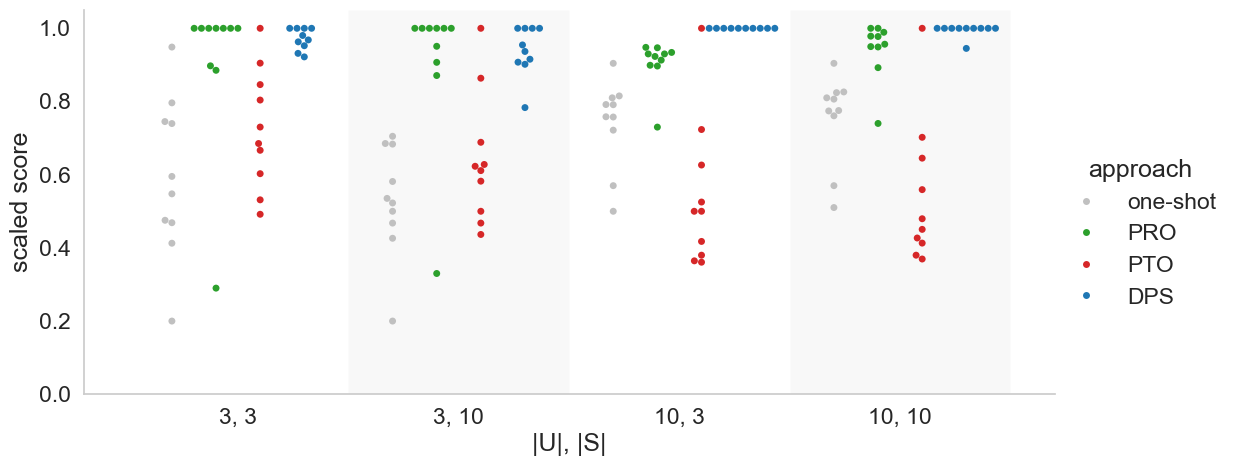

In [212]:
ax = sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=2.2,)
# plt.tight_layout()
plt.ylim(0, 1.05)
# ax.set_xlabel('X_axi',fontsize=20);
# ax.set_ylabel('Y_axis',fontsize=20);
for x in range(0, len(results['|U|, |S|'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
plt.savefig(f'figs/{mode}_N{manhattan_diam}_compare_approaches_scaled_swarmplot.png', dpi=300)

C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


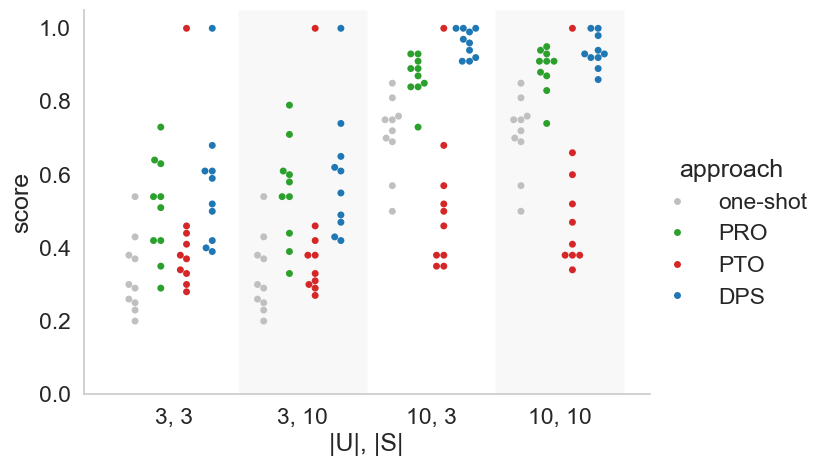

In [213]:
ax = sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=1.4)
plt.ylim(0, 1.05)
ax.set(ylabel='score')
for x in range(0, len(results['|U|, |S|'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
plt.savefig(f'figs/{mode}_N{manhattan_diam}_compare_approaches_notscaled_swarmplot.png', dpi=300)

In [214]:
# PRO_variability = pd.DataFrame()
# approach = 'PRO'
# for num_units in [3, 10]:
#     for num_sensors in [3, 10]:
#         for instance in range(10):          
#             results_subset = results.query(f'approach == "{approach}" & num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
#             df_seed = pd.DataFrame()
#             df_seed['num_units'] = [num_units]
#             df_seed['num_sensors'] = [num_sensors]
#             df_seed['instance'] = [instance]
#             df_seed['seed'] = [seed]
#             df_seed['scaled score'] = [max(results_subset['scaled score'])]
#             df_seed['best score'] = [max(results_subset['best_score'])]
#             
#             PRO_variability = pd.concat([PRO_variability, df_seed], ignore_index=True)
# 
# PRO_variability['|U|, |S|'] = PRO_variability['num_units'].astype(int).astype(str) + ', ' + PRO_variability['num_sensors'].astype(int).astype(str)
# 
# sns.set(style={'style': "whitegrid", 'axes.grid' : False})
# 
# sub = ['3, 3','3, 10','10, 3','10, 10']
# dfs = PRO_variability[PRO_variability['|U|, |S|'].isin(sub)]
# 
# g = sns.FacetGrid(dfs, 
#                   col='|U|, |S|', 
#                   legend_out=True) 
# g.map(sns.scatterplot, 'instance', 'best score').add_legend()
# plt.ylim(0, 1.05)
# # g.fig.suptitle('DPS variability')
# g.savefig('figs/variability/PRO.png', dpi=300)

C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


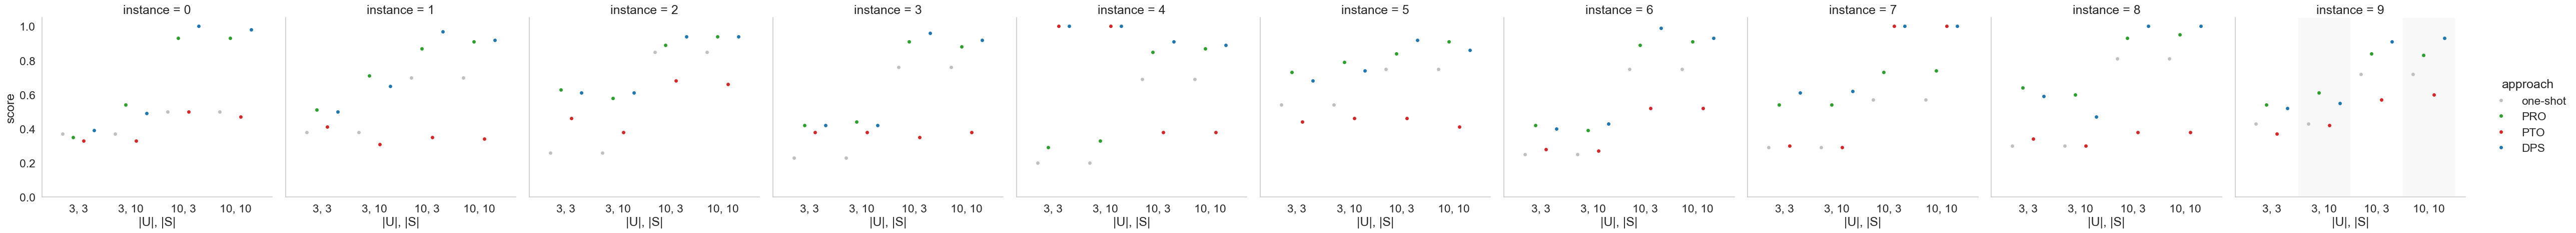

In [215]:
ax = sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, col='instance', kind='swarm', dodge=True)
# ww: 2.6, mh: 1.8
plt.ylim(0, 1.05)
ax.set(ylabel='score')
for x in range(0, len(results['|U|, |S|'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
plt.savefig(f'figs/N10_compare_approaches_notscaled_swarmplot_perinstance.png', dpi=300)

In [216]:
results[results['approach'] == 'PRO']

,num_units,num_sensors,instance,best_score,approach,scaled score,"|U|, |S|"
0,3,3,0,0.35,PRO,0.897436,"3, 3"
1,3,3,1,0.51,PRO,1.000000,"3, 3"
2,3,3,2,0.63,PRO,1.000000,"3, 3"
3,3,3,3,0.42,PRO,1.000000,"3, 3"
4,3,3,4,0.29,PRO,0.290000,"3, 3"
5,3,3,5,0.73,PRO,1.000000,"3, 3"
6,3,3,6,0.42,PRO,1.000000,"3, 3"
7,3,3,7,0.54,PRO,0.885246,"3, 3"
8,3,3,8,0.64,PRO,1.000000,"3, 3"
9,3,3,9,0.54,PRO,1.000000,"3, 3"


C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_3476\522379802.py:1: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', linewidth=1, boxprops={'alpha': 0.4}, gap=.2, aspect=2.7, whis=0, showfliers=False, linecolor='gray', showcaps = False, fill=False, medianprops=dict(linewidth=2), legend=False)
C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


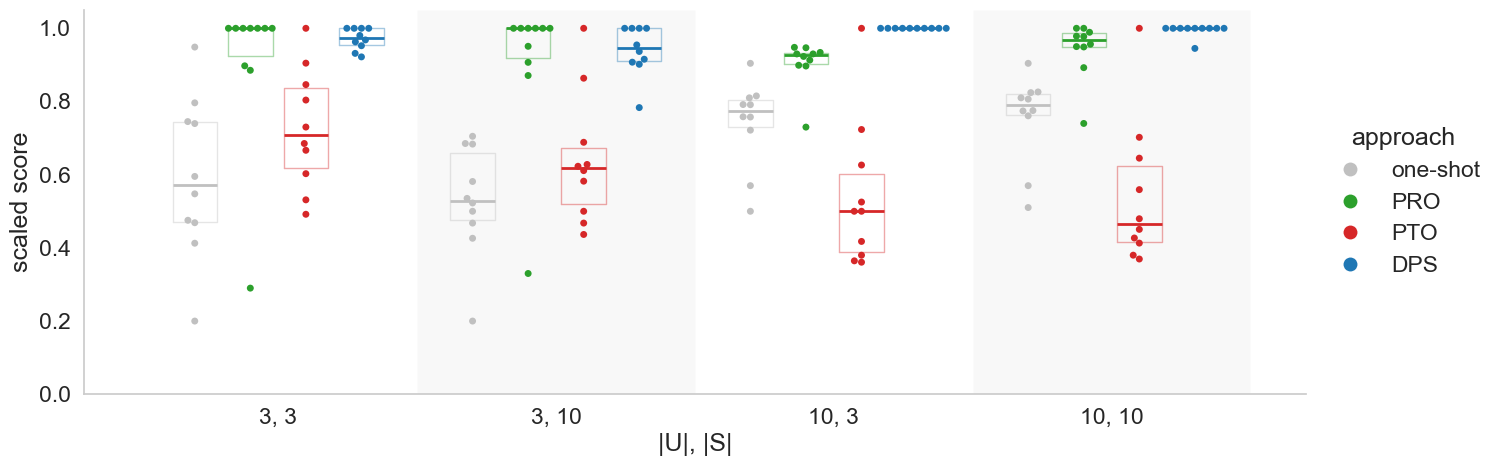

In [217]:
sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', linewidth=1, boxprops={'alpha': 0.4}, gap=.2, aspect=2.7, whis=0, showfliers=False, linecolor='gray', showcaps = False, fill=False, medianprops=dict(linewidth=2), legend=False)
# sns.boxplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, gap=.2, boxprops={'alpha': 0.4})
ax = sns.swarmplot(data=results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, dodge=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.75), markerscale=2, frameon=False)  

# g.map(sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, ))
# ww: 2.6, mh: 1.8
plt.ylim(0, 1.05)
ax.set(ylabel='scaled score')
for x in range(0, len(results['|U|, |S|'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])

plt.savefig(f'figs/N10_T10_compare_approaches_multiUS_boxplot.png', dpi=300, bbox_inches='tight')